In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier


# Loading Dataset

In [2]:
parent = r"C:/Users/Yaazhini/Downloads/6125_group/6125_group/"
df = pd.read_csv(parent+"student_output.csv") 
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,0.668496,-0.296908,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.23094,-2.232677,-0.708450
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,-1.495896,-0.296908,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.23094,0.447893,-0.708450
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,0.668496,-0.296908,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.23094,0.447893,-0.708450
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,0.668496,-0.296908,-0.385040,0.795130,1.087346,0.982433,0.507899,0.23094,0.447893,1.411533
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,-1.495896,-0.296908,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.23094,-2.232677,-0.708450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                395 non-null    float64
 1   Medu               395 non-null    float64
 2   Fedu               395 non-null    float64
 3   traveltime         395 non-null    float64
 4   studytime          395 non-null    float64
 5   failures           395 non-null    float64
 6   famrel             395 non-null    float64
 7   freetime           395 non-null    float64
 8   goout              395 non-null    float64
 9   Dalc               395 non-null    float64
 10  Walc               395 non-null    float64
 11  health             395 non-null    float64
 12  absences           395 non-null    float64
 13  G3                 395 non-null    float64
 14  school_MS          395 non-null    float64
 15  sex_M              395 non-null    float64
 16  address_U          395 non

PCA-reduced shape: (395, 2)


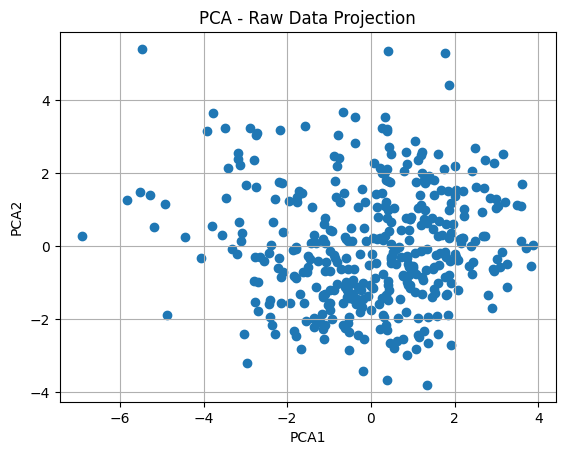

In [4]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA-reduced shape: {X_pca.shape}")

results = {}

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - Raw Data Projection')
plt.grid(True)
plt.show()

# K-Means Clustering

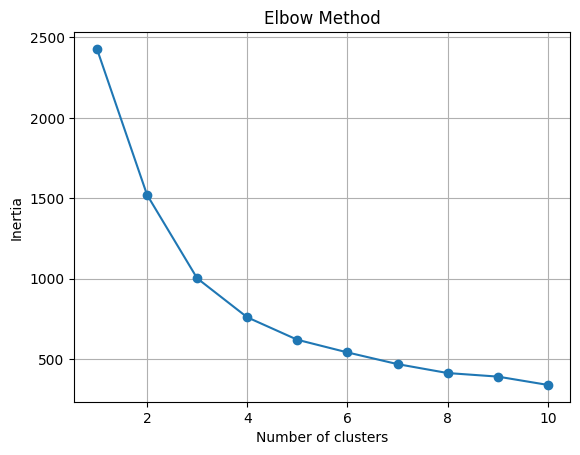

In [5]:
# Elbow Method to find the number of clusters to use
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)
score_kmeans = silhouette_score(X_pca, labels_kmeans)
results['KMeans'] = (labels_kmeans, score_kmeans)
print("KMeans Silhouette Score:", silhouette_score(X_pca, labels_kmeans))

KMeans Silhouette Score: 0.3602096466258837


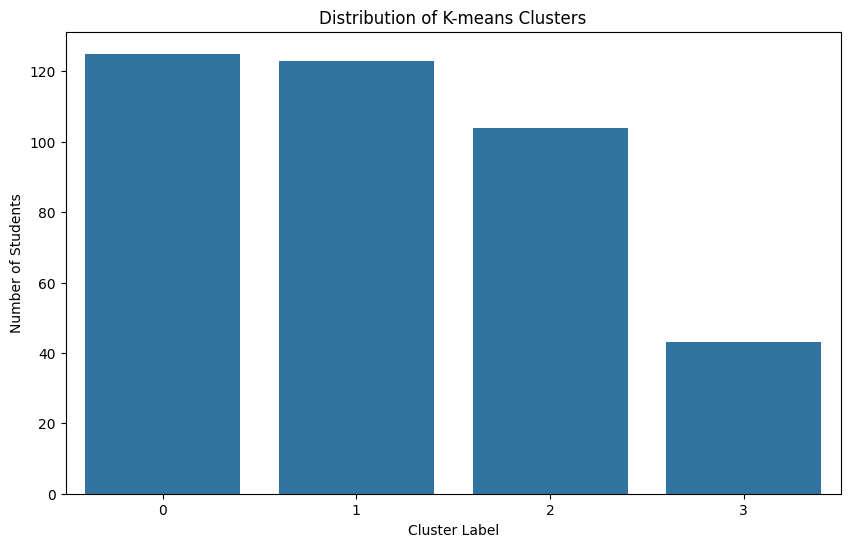

In [7]:
# Plotting the clusters in K-Means
plt.figure(figsize=(10, 6))
sns.countplot(x=labels_kmeans)
plt.title('Distribution of K-means Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Students')
plt.show()

# Agglomerative Clustering 

In [8]:
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(X_pca)
score_agglo = silhouette_score(X_pca, labels_agglo)
results['Agglomerative'] = (labels_agglo, score_agglo)
print("Agglomerative Silhouette Score:", silhouette_score(X_pca, labels_agglo))

Agglomerative Silhouette Score: 0.31047878110835586


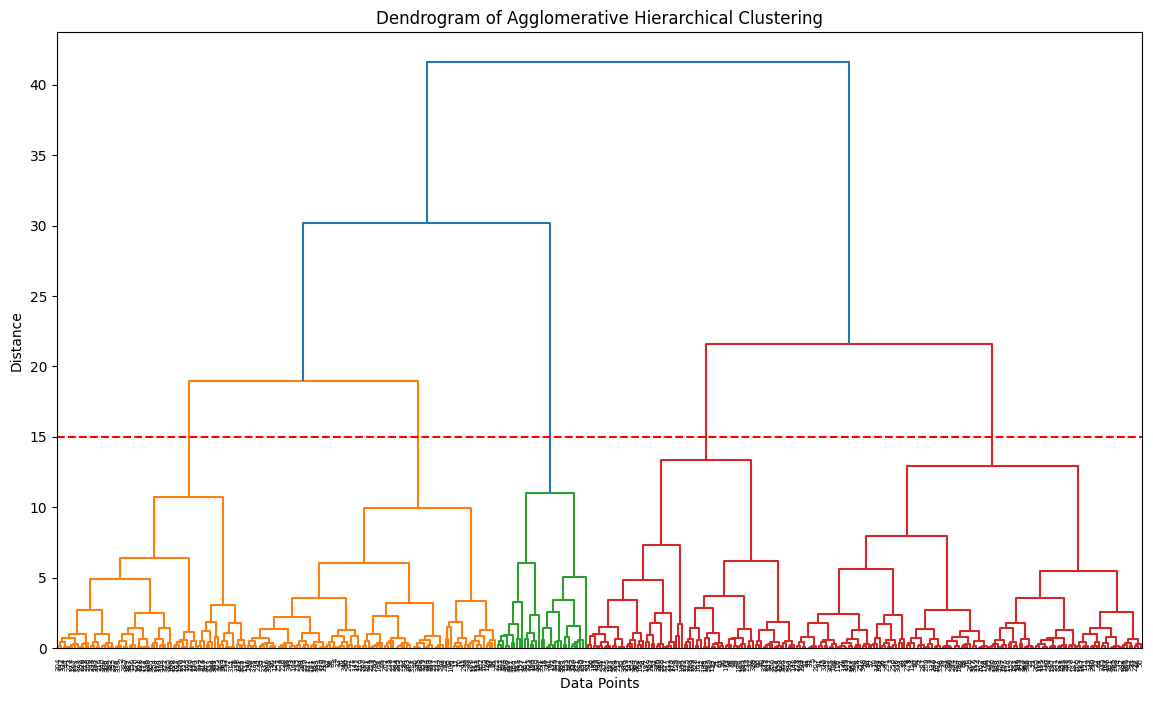

In [9]:
# Hierarchical clustering using linkage
linked = linkage(X_pca, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(linked,
            orientation='top',
            labels=None,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram of Agglomerative Hierarchical Clustering')
plt.axhline(y=15, color='r', linestyle='--') 
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# DBSCAN Clustering

In [10]:
dbscan = DBSCAN(eps=0.61, min_samples=5) 
labels_dbscan = dbscan.fit_predict(X_pca)
if len(set(labels_dbscan)) > 1 and len(set(labels_dbscan)) != len(X_pca):
    score_dbscan = silhouette_score(X_pca[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
else:
    score_dbscan = -1
results['DBSCAN'] = (labels_dbscan, score_dbscan)

print("DBSCAN_Cluster Score:", silhouette_score(X_pca, labels_dbscan))

DBSCAN_Cluster Score: 0.2967511890048483


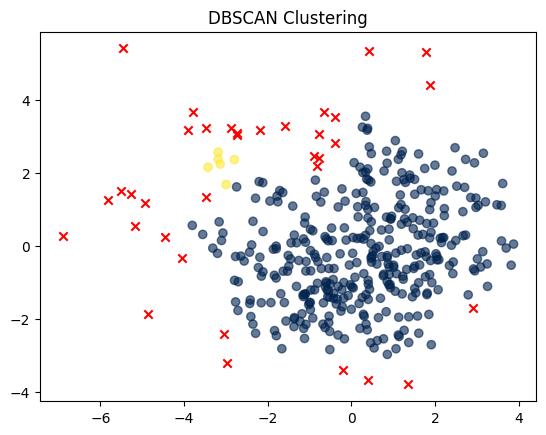

In [11]:
noise_mask = labels_dbscan == -1
non_noise_mask = labels_dbscan != -1

# plot non-noise points
plt.scatter(X_pca[non_noise_mask, 0], X_pca[non_noise_mask, 1],
            c=labels_dbscan[non_noise_mask], cmap="cividis", alpha=0.6, label="Clusters")

# plot noise points in red
plt.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1],
            c='red', marker='x', label="Noise")

plt.title('DBSCAN Clustering')
plt.show()

# Comparison between clusters

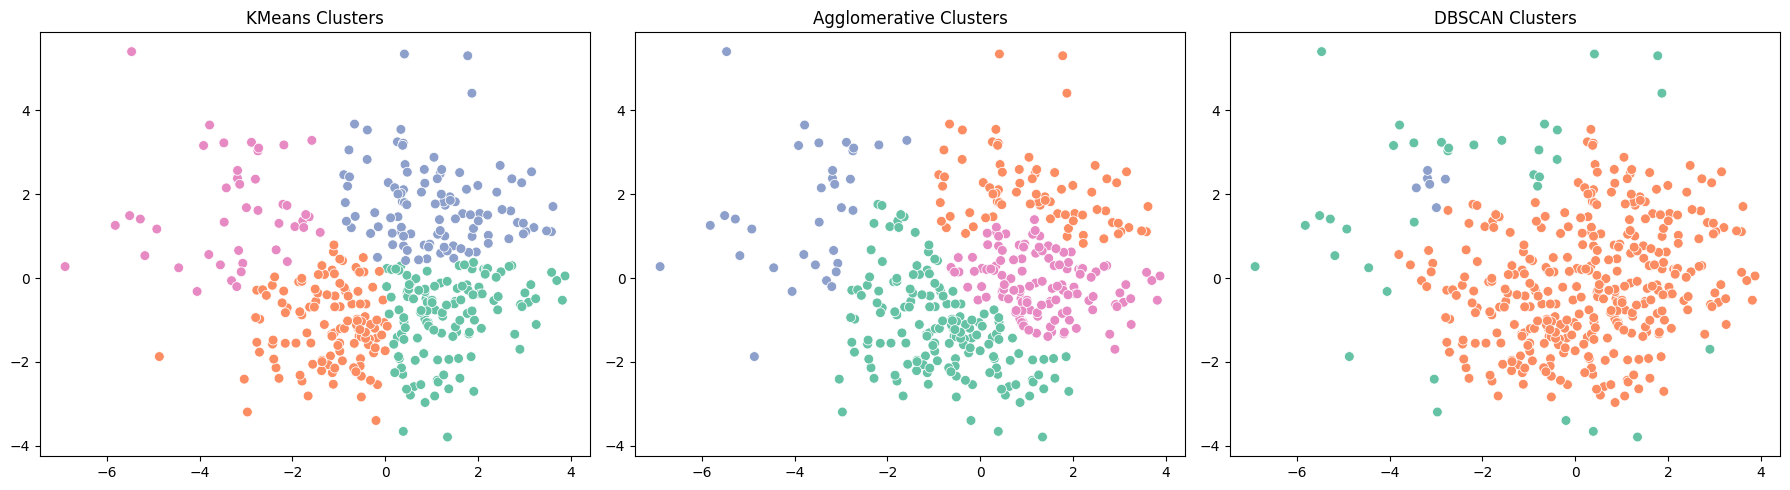

In [12]:
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(18, 5))

    for i, (method, (labels, _)) in enumerate(results.items(), 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=50, legend=None)
        plt.title(f"{method} Clusters")

    plt.tight_layout()
    plt.show()


Representation of Clusters with Boundaries

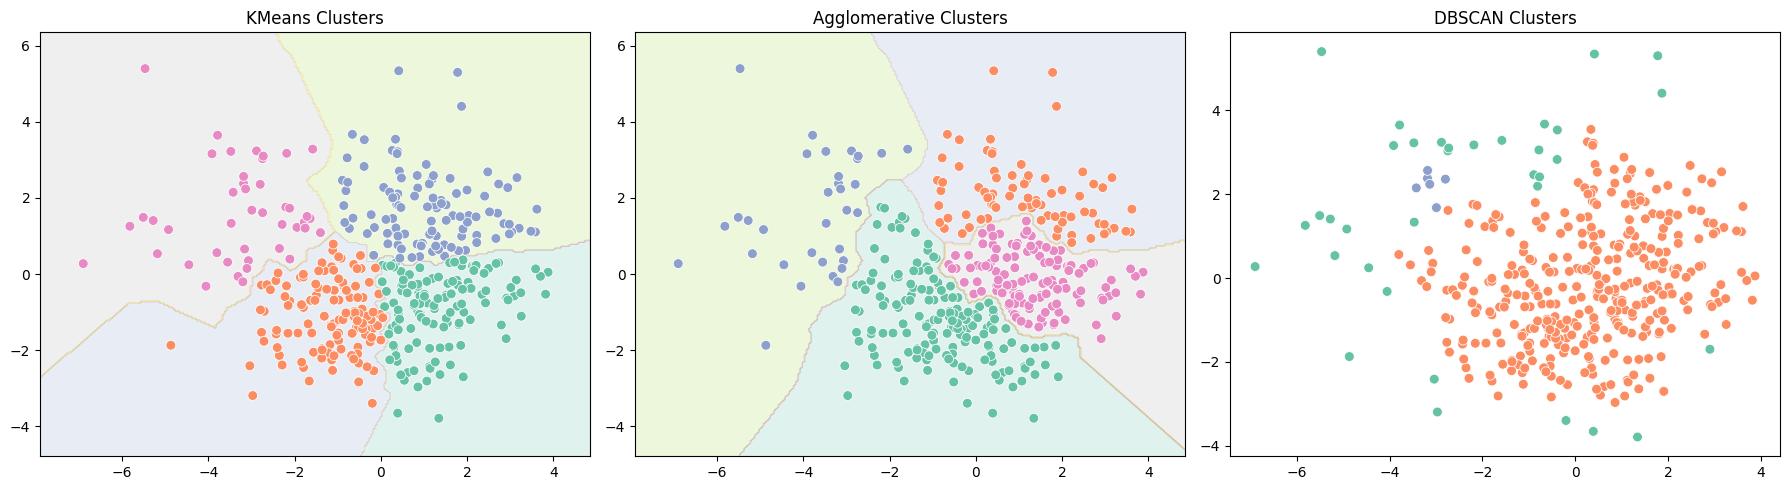

In [13]:
plt.figure(figsize=(18, 5))

h = 0.05  
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for i, (method, (labels, model)) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)

    # Only plot decision boundary for KMeans and Agglomerative
    if method != "DBSCAN":
        # Use a KNN classifier to draw decision boundary
        clf = KNeighborsClassifier(n_neighbors=1)
        clf.fit(X_pca, labels)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot decision boundary
        plt.contourf(xx, yy, Z, alpha=0.2, cmap='Set2')
        
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=50, legend=None)
    plt.title(f"{method} Clusters")

plt.tight_layout()
plt.show()